In [187]:
import importlib
import parse
import matplotlib.pyplot as plt
import statistics
from scipy.signal import savgol_filter
import datetime
from matplotlib.dates import DateFormatter, AutoDateLocator

In [188]:
_ = importlib.reload(parse)

In [189]:
output_file = "measurements.txt"
target_ip = "8.8.4.4"
gateway_ip = "100.64.0.1"

In [190]:
measurements = parse.parse_measurements(output_file, target_ip)

# Measurement Counts

## Total

In [191]:
total_measurements = len(measurements)
print(f"Total measurements: {total_measurements}")

Total measurements: 5509


## By Probe ID

In [192]:
measurements_by_probe_id = {}
for measurement in measurements:
    if measurement.id not in measurements_by_probe_id:
        measurements_by_probe_id[measurement.id] = []
    measurements_by_probe_id[measurement.id].append(measurement)

In [193]:
for probe_id, probe_measurements in measurements_by_probe_id.items():
    print(f"Probe ID: {probe_id},\tMeasurement count: {len(probe_measurements)}")

Probe ID: 1006477,	Measurement count: 279
Probe ID: 1006896,	Measurement count: 279
Probe ID: 1006948,	Measurement count: 279
Probe ID: 1007159,	Measurement count: 259
Probe ID: 1007645,	Measurement count: 274
Probe ID: 1008228,	Measurement count: 279
Probe ID: 1008786,	Measurement count: 279
Probe ID: 1009988,	Measurement count: 279
Probe ID: 1010332,	Measurement count: 279
Probe ID: 1011217,	Measurement count: 279
Probe ID: 13040,	Measurement count: 279
Probe ID: 28430,	Measurement count: 279
Probe ID: 50524,	Measurement count: 259
Probe ID: 51136,	Measurement count: 279
Probe ID: 60323,	Measurement count: 279
Probe ID: 62613,	Measurement count: 279
Probe ID: 63017,	Measurement count: 279
Probe ID: 63025,	Measurement count: 279
Probe ID: 64237,	Measurement count: 271
Probe ID: 1010769,	Measurement count: 261


## By Probe ID

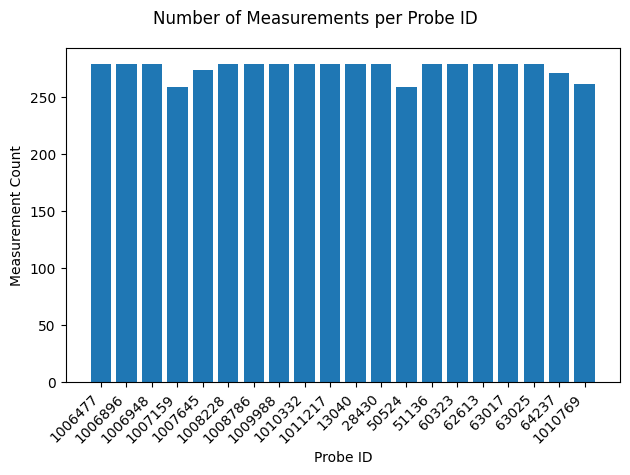

In [194]:
probe_ids = list(measurements_by_probe_id.keys())
measurement_counts = [len(measurements_by_probe_id[probe_id]) for probe_id in probe_ids]
fig, ax = plt.subplots()
ax.bar(probe_ids, measurement_counts)
ax.set_xlabel('Probe ID')
ax.set_ylabel('Measurement Count')
for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')
fig.suptitle('Number of Measurements per Probe ID')
fig.tight_layout()

# Successful vs Unsuccessful Measurements

## Total

Total measurements: 5509
Successful measurements: 5455 (99.02%)
Unsuccessful measurements: 54 (0.98%)


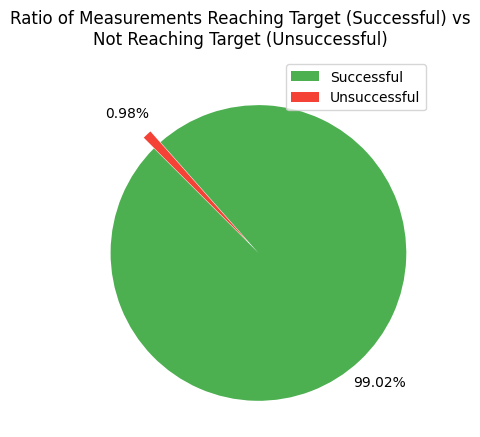

In [195]:
total_measurements = len(measurements)
print(f"Total measurements: {total_measurements}")
successful_measurements = [m for m in measurements if m.reached_target]
successful_count = len(successful_measurements)
print(f"Successful measurements: {successful_count} ({successful_count / total_measurements * 100:.2f}%)")
unsuccessful_measurements = [m for m in measurements if not m.reached_target]
unsuccessful_count = len(unsuccessful_measurements)
print(f"Unsuccessful measurements: {unsuccessful_count} ({unsuccessful_count / total_measurements * 100:.2f}%)")

labels = ['Successful', 'Unsuccessful']
sizes = [successful_count, unsuccessful_count]
colors = ['#4CAF50', '#F44336']
explode = (0.1, 0)
fig, ax1 = plt.subplots()
_ = ax1.pie(sizes, explode=explode, colors=colors, autopct='%.2f%%', startangle=135, pctdistance=1.2)
_ = ax1.legend(labels, loc="upper right")
_ = fig.suptitle('Ratio of Measurements Reaching Target (Successful) vs\nNot Reaching Target (Unsuccessful)')

## By Probe ID

In [196]:
for probe_id, probe_measurements in measurements_by_probe_id.items():
    successful_count = sum(1 for m in probe_measurements if m.reached_target)
    unsuccessful_count = len(probe_measurements) - successful_count
    print(f"Probe ID: {probe_id},\tSuccessful: {successful_count},\tUnsuccessful: {unsuccessful_count}")

Probe ID: 1006477,	Successful: 277,	Unsuccessful: 2
Probe ID: 1006896,	Successful: 278,	Unsuccessful: 1
Probe ID: 1006948,	Successful: 270,	Unsuccessful: 9
Probe ID: 1007159,	Successful: 259,	Unsuccessful: 0
Probe ID: 1007645,	Successful: 273,	Unsuccessful: 1
Probe ID: 1008228,	Successful: 279,	Unsuccessful: 0
Probe ID: 1008786,	Successful: 277,	Unsuccessful: 2
Probe ID: 1009988,	Successful: 276,	Unsuccessful: 3
Probe ID: 1010332,	Successful: 279,	Unsuccessful: 0
Probe ID: 1011217,	Successful: 279,	Unsuccessful: 0
Probe ID: 13040,	Successful: 278,	Unsuccessful: 1
Probe ID: 28430,	Successful: 279,	Unsuccessful: 0
Probe ID: 50524,	Successful: 259,	Unsuccessful: 0
Probe ID: 51136,	Successful: 279,	Unsuccessful: 0
Probe ID: 60323,	Successful: 279,	Unsuccessful: 0
Probe ID: 62613,	Successful: 279,	Unsuccessful: 0
Probe ID: 63017,	Successful: 278,	Unsuccessful: 1
Probe ID: 63025,	Successful: 278,	Unsuccessful: 1
Probe ID: 64237,	Successful: 239,	Unsuccessful: 32
Probe ID: 1010769,	Successful

## By Probe ID

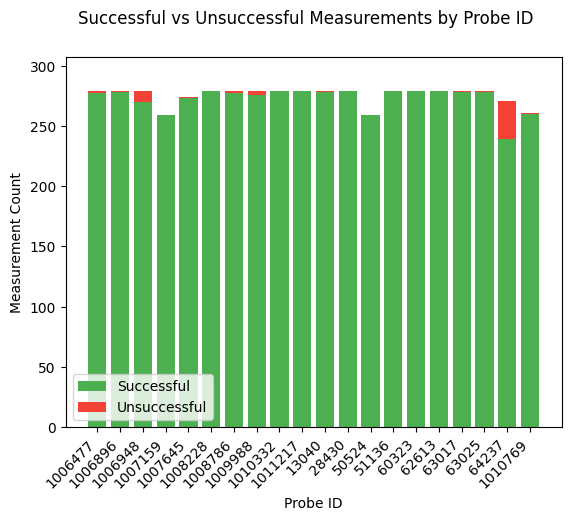

In [197]:
fig, ax1 = plt.subplots()
successful = [sum(1 for m in measurements_by_probe_id[probe_id] if m.reached_target) for probe_id in probe_ids]
unsuccessful = [sum(1 for m in measurements_by_probe_id[probe_id] if not m.reached_target) for probe_id in probe_ids]
ax1.bar(probe_ids, successful, label='Successful', color='#4CAF50')
ax1.bar(probe_ids, unsuccessful, label='Unsuccessful', color='#F44336', bottom=successful)
ax1.set_xlabel('Probe ID')
ax1.set_ylabel('Measurement Count')
ax1.set_ylim(0, max([s + u for s, u in zip(successful, unsuccessful)]) * 1.1)
for label in ax1.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')
fig.suptitle('Successful vs Unsuccessful Measurements by Probe ID')
_ = ax1.legend()

# Gateway Visibility

## Total

Measurements where gateway IP (100.64.0.1) is present:	4896
Measurements where gateway IP (100.64.0.1) is absent:	613
Figure size: 6.4 x 4.8 inches


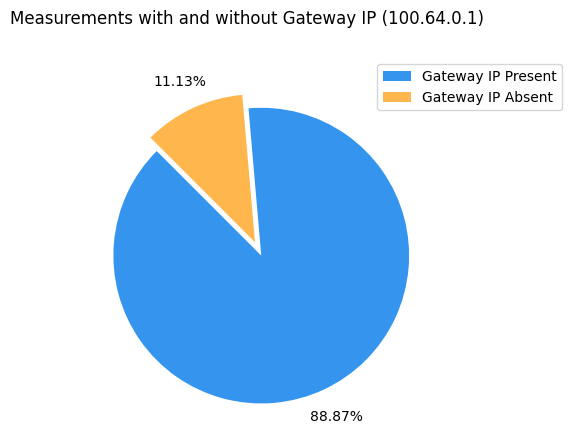

In [198]:
gateway_present, gateway_absent = parse.get_probe_measurements_with_and_without_ip(measurements, gateway_ip)
print(f"Measurements where gateway IP ({gateway_ip}) is present:\t{len(gateway_present)}")
print(f"Measurements where gateway IP ({gateway_ip}) is absent:\t{len(gateway_absent)}")

fig, ax1 = plt.subplots()
labels = ['Gateway IP Present', 'Gateway IP Absent']
sizes = [len(gateway_present), len(gateway_absent)]
colors = ["#3595EE", "#FFB74D"]
explode = (0.1, 0)
_ = ax1.pie(sizes, explode=explode, colors=colors, autopct='%.2f%%', startangle=135, pctdistance=1.2)
_ = ax1.legend(labels, loc="upper right", bbox_to_anchor=(1.35, 1))
_ = fig.suptitle('Measurements with and without Gateway IP (' + gateway_ip + ')')

# get fig size in the same units passed to the `subplots` function
fig_size = fig.get_size_inches()
print(f"Figure size: {fig_size[0]} x {fig_size[1]} inches")


## Total (with Success or Failure)

Successful measurements where gateway IP (100.64.0.1) is present: 4886
Successful measurements where gateway IP (100.64.0.1) is absent: 569
Unsuccessful measurements where gateway IP (100.64.0.1) is present: 10
Unsuccessful measurements where gateway IP (100.64.0.1) is absent: 44


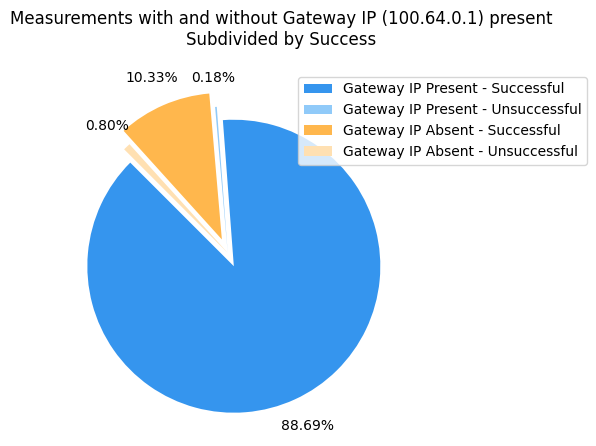

In [199]:
gateway_present_successful = [m for m in gateway_present if m.reached_target]
gateway_present_unsuccessful = [m for m in gateway_present if not m.reached_target]
gateway_absent_successful = [m for m in gateway_absent if m.reached_target]
gateway_absent_unsuccessful = [m for m in gateway_absent if not m.reached_target]
print(f"Successful measurements where gateway IP ({gateway_ip}) is present: {len(gateway_present_successful)}")
print(f"Successful measurements where gateway IP ({gateway_ip}) is absent: {len(gateway_absent_successful)}")
print(f"Unsuccessful measurements where gateway IP ({gateway_ip}) is present: {len(gateway_present_unsuccessful)}")
print(f"Unsuccessful measurements where gateway IP ({gateway_ip}) is absent: {len(gateway_absent_unsuccessful)}")
fig, ax1 = plt.subplots(figsize=(6, 4.5))
labels = ['Gateway IP Present - Successful', 'Gateway IP Present - Unsuccessful',
          'Gateway IP Absent - Successful', 'Gateway IP Absent - Unsuccessful']
sizes = [len(gateway_present_successful), len(gateway_present_unsuccessful),
         len(gateway_absent_successful), len(gateway_absent_unsuccessful)]
colors = ["#3595EE", "#90CAF9", "#FFB74D", "#FFE0B2"]
explode = (0.1, 0, 0.1, 0)
_ = ax1.pie(sizes, explode=explode, colors=colors, autopct='%.2f%%', startangle=135, pctdistance=1.2)
_ = ax1.legend(labels, loc="upper right", bbox_to_anchor=(1.5, 1))
_ = fig.suptitle('Measurements with and without Gateway IP (' + gateway_ip + ') present\nSubdivided by Success')
_ = fig.tight_layout()

## By Probe ID
We continue with only the successful measurements

In [200]:
successful_measurements = []
for probe_id, probe_measurements in measurements_by_probe_id.items():
    successful_measurements.extend([m for m in probe_measurements if m.reached_target])

successful_measurements_by_probe_id = {}
for measurement in successful_measurements:
    if measurement.id not in successful_measurements_by_probe_id:
        successful_measurements_by_probe_id[measurement.id] = []
    successful_measurements_by_probe_id[measurement.id].append(measurement)

In [201]:
successful_measurements_gateway_presence_per_probe_id = {probe_id: {"present": [], "absent": []} for probe_id in measurements_by_probe_id.keys()}
for probe_id, probe_measurements in successful_measurements_by_probe_id.items():
    present, absent = parse.get_probe_measurements_with_and_without_ip(probe_measurements, gateway_ip)
    successful_measurements_gateway_presence_per_probe_id[probe_id]["present"].extend(present)
    successful_measurements_gateway_presence_per_probe_id[probe_id]["absent"].extend(absent)

In [202]:
print(f"Successful measurements with gateway IP ({gateway_ip}) presence by probe ID:")
for probe_id in probe_ids:
    present_count = len(successful_measurements_gateway_presence_per_probe_id[probe_id]["present"])
    absent_count = len(successful_measurements_gateway_presence_per_probe_id[probe_id]["absent"])
    print(f"{'Probe ID:':<10} {probe_id:<10} {'Gateway IP Present:':<20} {present_count:<5} {'Gateway IP Absent:':<20} {absent_count:<5}")

Successful measurements with gateway IP (100.64.0.1) presence by probe ID:
Probe ID:  1006477    Gateway IP Present:  0     Gateway IP Absent:   277  
Probe ID:  1006896    Gateway IP Present:  278   Gateway IP Absent:   0    
Probe ID:  1006948    Gateway IP Present:  0     Gateway IP Absent:   270  
Probe ID:  1007159    Gateway IP Present:  259   Gateway IP Absent:   0    
Probe ID:  1007645    Gateway IP Present:  271   Gateway IP Absent:   2    
Probe ID:  1008228    Gateway IP Present:  279   Gateway IP Absent:   0    
Probe ID:  1008786    Gateway IP Present:  276   Gateway IP Absent:   1    
Probe ID:  1009988    Gateway IP Present:  272   Gateway IP Absent:   4    
Probe ID:  1010332    Gateway IP Present:  278   Gateway IP Absent:   1    
Probe ID:  1011217    Gateway IP Present:  279   Gateway IP Absent:   0    
Probe ID:  13040      Gateway IP Present:  278   Gateway IP Absent:   0    
Probe ID:  28430      Gateway IP Present:  274   Gateway IP Absent:   5    
Probe ID:  50

## By Probe ID
Again, only successful measurements

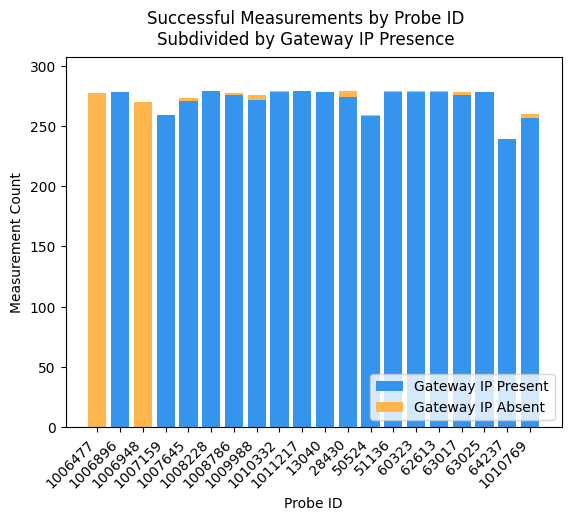

In [203]:

fig, ax1 = plt.subplots()
successful_present = [len(successful_measurements_gateway_presence_per_probe_id[probe_id]["present"]) for probe_id in probe_ids]
successful_absent = [len(successful_measurements_gateway_presence_per_probe_id[probe_id]["absent"]) for probe_id in probe_ids]
ax1.bar(probe_ids, successful_present, label='Gateway IP Present', color='#3595EE')
ax1.bar(probe_ids, successful_absent, label='Gateway IP Absent', color='#FFB74D', bottom=successful_present)
ax1.set_xlabel('Probe ID')
ax1.set_ylabel('Measurement Count')
ax1.set_ylim(0, max([s + u for s, u in zip(successful_present, successful_absent)]) * 1.1)
for label in ax1.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')
fig.suptitle('Successful Measurements by Probe ID\nSubdivided by Gateway IP Presence')
_ = ax1.legend(loc="lower right")

# Bent Pipe Latency
For the probes that don't have the gateway IP 100.64.0.1 present in the trace, we assume the first visible IP is the gateway IP.

## RTT Distribution per Probe ID

In [204]:
data = []
labels = []
for probe_id in probe_ids:
    probe_latencies = []
    probe_measurements = successful_measurements_gateway_presence_per_probe_id[probe_id]["present"]
    for measurement in probe_measurements:
        for hop in measurement.hops:
            if hop.ip == gateway_ip and hop.rtt_times_ms:
                mean_rtt = sum(hop.rtt_times_ms) / len(hop.rtt_times_ms)
                probe_latencies.append(mean_rtt)

    if probe_latencies:
        data.append(probe_latencies)
        labels.append(str(probe_id))

        q1, q2, q3 = statistics.quantiles(probe_latencies, n=4)
        interquartile_range = q3 - q1
        lower_bound = q1 - 1.5 * interquartile_range
        upper_bound = q3 + 1.5 * interquartile_range

        outliers = [x for x in probe_latencies if x < lower_bound or x > upper_bound]
        inliers = [x for x in probe_latencies if lower_bound <= x <= upper_bound]

        print(f"Probe ID: {probe_id}")
        print(f"  Number of outliers: {len(outliers)}")
        print(f"  Number of inliers: {len(inliers)}")

Probe ID: 1006896
  Number of outliers: 9
  Number of inliers: 269
Probe ID: 1007159
  Number of outliers: 4
  Number of inliers: 255
Probe ID: 1007645
  Number of outliers: 16
  Number of inliers: 255
Probe ID: 1008228
  Number of outliers: 3
  Number of inliers: 276
Probe ID: 1008786
  Number of outliers: 8
  Number of inliers: 268
Probe ID: 1009988
  Number of outliers: 16
  Number of inliers: 256
Probe ID: 1010332
  Number of outliers: 13
  Number of inliers: 265
Probe ID: 1011217
  Number of outliers: 20
  Number of inliers: 259
Probe ID: 13040
  Number of outliers: 20
  Number of inliers: 258
Probe ID: 28430
  Number of outliers: 16
  Number of inliers: 258
Probe ID: 50524
  Number of outliers: 12
  Number of inliers: 246
Probe ID: 51136
  Number of outliers: 9
  Number of inliers: 269
Probe ID: 60323
  Number of outliers: 13
  Number of inliers: 265
Probe ID: 62613
  Number of outliers: 10
  Number of inliers: 268
Probe ID: 63017
  Number of outliers: 14
  Number of inliers: 262

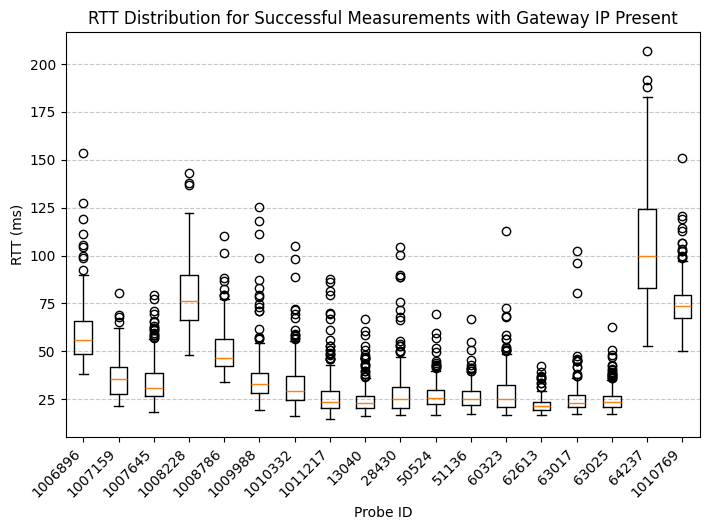

In [205]:

fig, ax = plt.subplots(figsize=(7.2, 5.4))
ax.boxplot(data, tick_labels=labels)
ax.set_xlabel('Probe ID')
ax.set_ylabel('RTT (ms)')
ax.set_title('RTT Distribution for Successful Measurements with Gateway IP Present')
for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
fig.tight_layout()

## Median RTT over Time per Probe ID

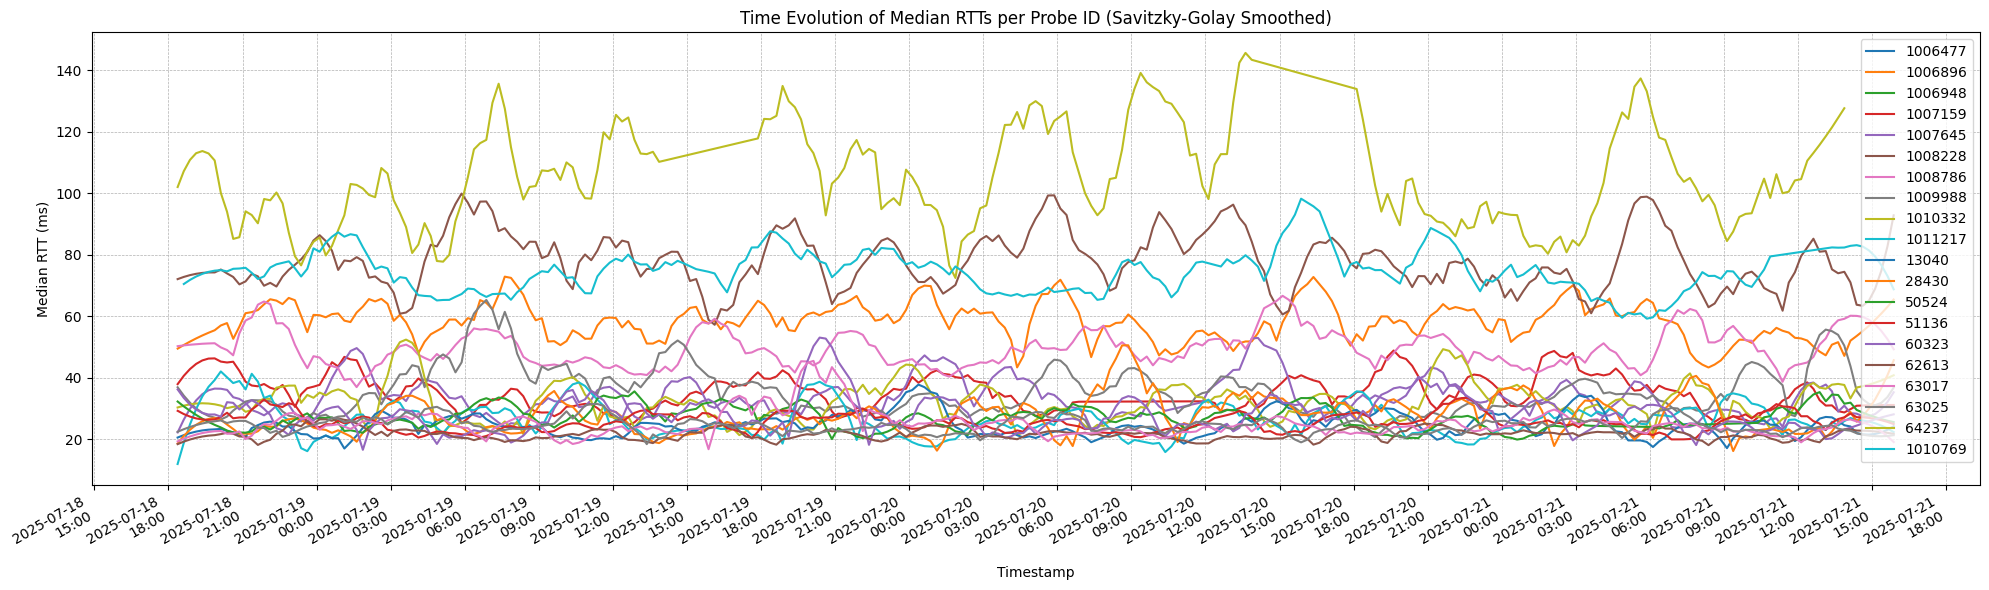

In [209]:
probe_time_series = {probe_id: [] for probe_id in probe_ids}
probe_time_stamps = {probe_id: [] for probe_id in probe_ids}
for probe_id in probe_ids:
    probe_measurements = successful_measurements_gateway_presence_per_probe_id[probe_id]["present"]
    for measurement in sorted(probe_measurements, key=lambda m: m.timestamp):
        for hop in measurement.hops:
            if hop.ip == gateway_ip and hop.rtt_times_ms:
                median_rtt = statistics.median(hop.rtt_times_ms)
                probe_time_series[probe_id].append(median_rtt)
                probe_time_stamps[probe_id].append(datetime.datetime.fromtimestamp(measurement.timestamp))
fig, ax = plt.subplots(figsize=(20, 6))
for probe_id in probe_ids:
    y = probe_time_series[probe_id]
    x = probe_time_stamps[probe_id]
    if len(y) >= 5:
        y_smooth = savgol_filter(y, window_length=13, polyorder=2)
        ax.plot(x, y_smooth, label=str(probe_id))
    else:
        ax.plot(x, y, label=str(probe_id))
ax.set_xlabel("Timestamp")
ax.set_ylabel("Median RTT (ms)")
ax.set_title("Time Evolution of Median RTTs per Probe ID (Savitzky-Golay Smoothed)")
ax.legend()
ax.xaxis.set_major_locator(AutoDateLocator(minticks=10, maxticks=30))
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n%H:%M"))
fig.autofmt_xdate()
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
fig.tight_layout()

### Top three highest median RTTs are:
* **Lime**: Marshall Islands (Oceania)
* **Brown**: Kiribati (Oceania)
* **Cyan**: Yemen (Asia)

**Assumption**: There are no ground stations in these countries, so the RTT includes more intersatellite links.

## RTT Distribution per Continent per Probe ID

In [163]:
continents = {
    "Africa": {},
    "Asia": {},
    "Europe": {},
    "North America": {},
    "Oceania": {},
    "South America": {}
}

for continent in continents:
    continents[continent] = {"probe_ids": []}

continents["North America"]["probe_ids"].extend(["1011217", "1007159", "62613", "63017", "63025", "1006896", "1006948", ])
continents["South America"]["probe_ids"].extend(["1007645"])
continents["Europe"]["probe_ids"].extend(["1010332", "13040", "28430", "51136", "60323", ])
continents["Oceania"]["probe_ids"].extend(["64237", "1008228"])
continents["Africa"]["probe_ids"].extend(["1008786"])
continents["Asia"]["probe_ids"].extend(["50524", "1010769", "1009988", "1006477"])

### Africa

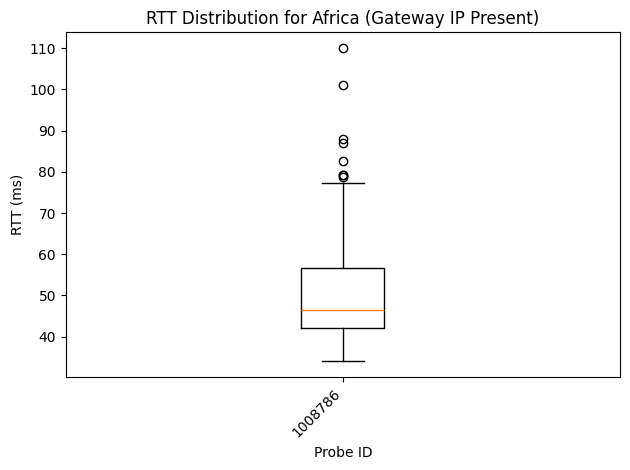

In [215]:
for continent, info in continents.items():
    if continent != "Africa":
        continue
    data = []
    labels = []
    for probe_id in info["probe_ids"]:
        probe_latencies = []
        probe_measurements = successful_measurements_gateway_presence_per_probe_id.get(probe_id, {}).get("present", [])
        for measurement in probe_measurements:
            for hop in measurement.hops:
                if hop.ip == gateway_ip and hop.rtt_times_ms:
                    mean_rtt = sum(hop.rtt_times_ms) / len(hop.rtt_times_ms)
                    probe_latencies.append(mean_rtt)
        if probe_latencies:
            data.append(probe_latencies)
            labels.append(str(probe_id))
    if data:
        fig, ax1 = plt.subplots()
        ax1.boxplot(data, tick_labels=labels)
        ax1.set_xlabel('Probe ID')
        ax1.set_ylabel('RTT (ms)')
        ax1.set_title(f'RTT Distribution for {continent} (Gateway IP Present)')
        for label in ax1.get_xticklabels():
            label.set_rotation(45)
            label.set_ha('right')
        fig.tight_layout()

### Africa

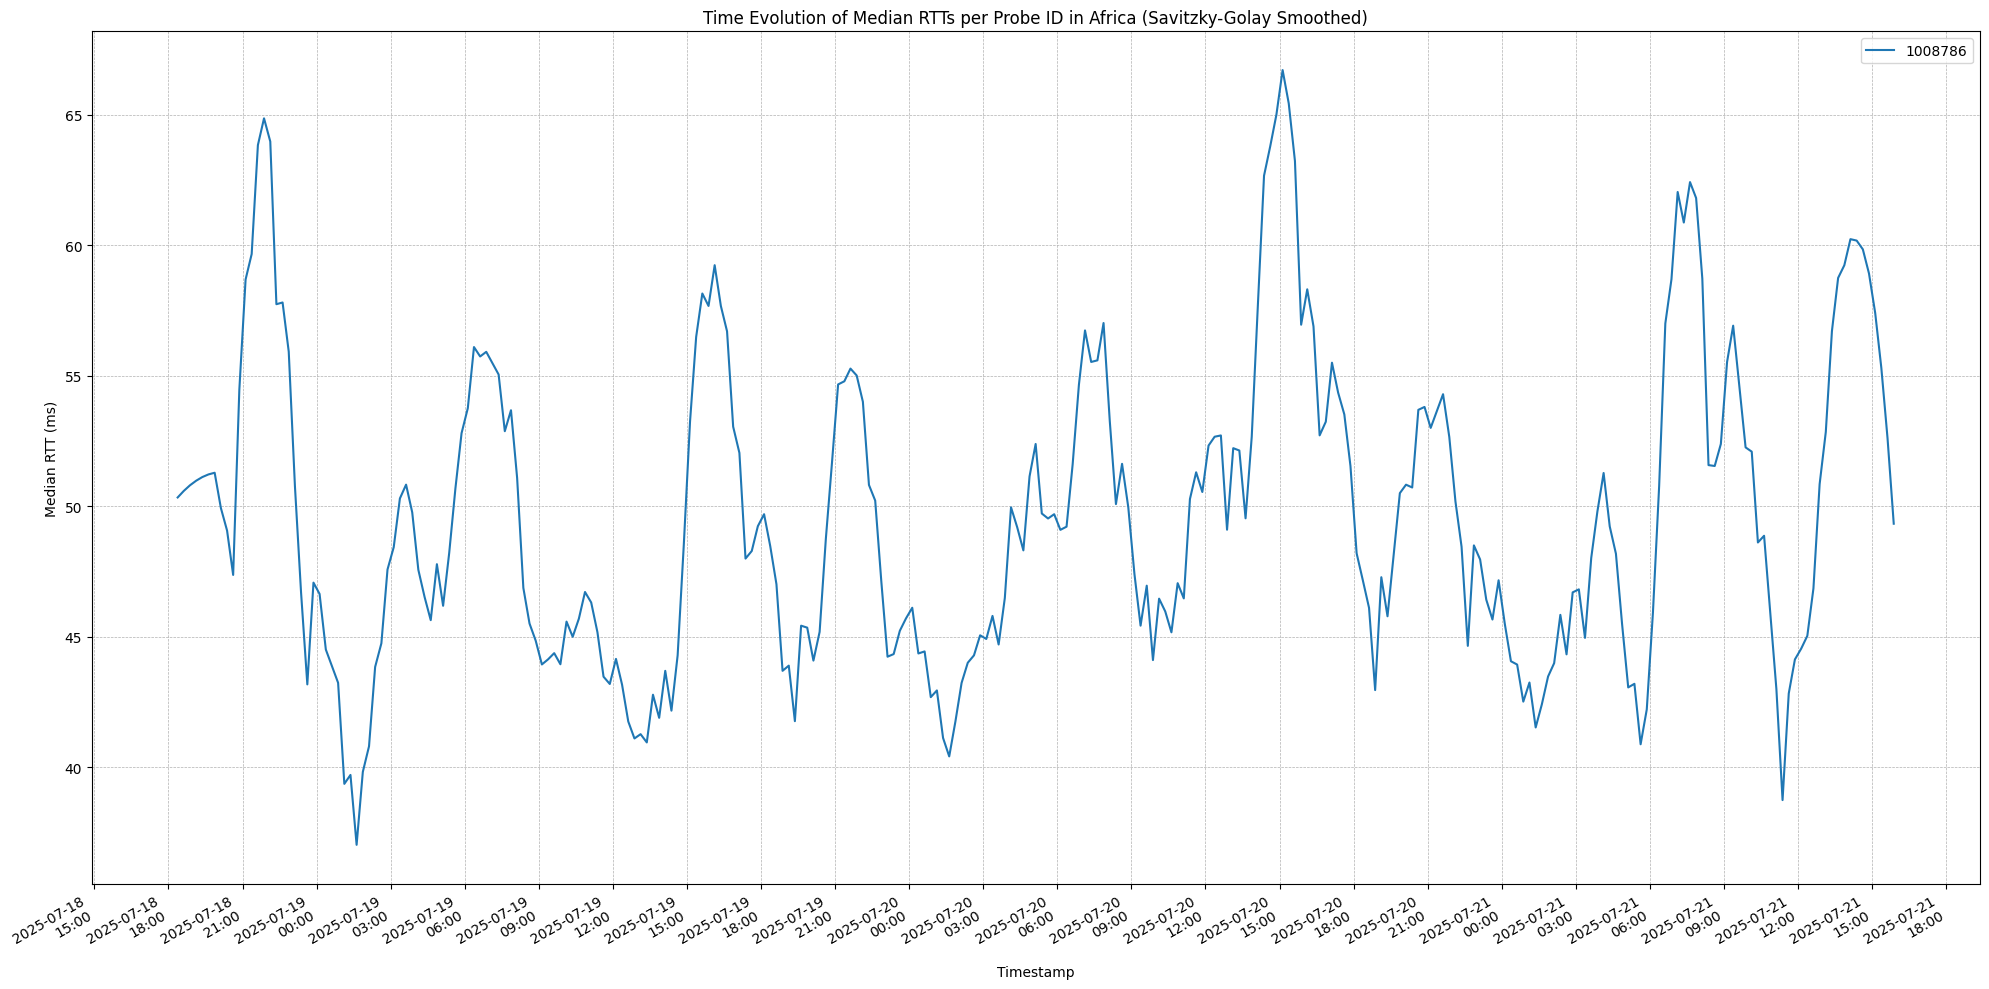

In [214]:
for continent, info in continents.items():
    if continent != "Africa":
        continue
    data = []
    labels = []
    for probe_id in info["probe_ids"]:
        probe_latencies = []
        probe_measurements = successful_measurements_gateway_presence_per_probe_id.get(probe_id, {}).get("present", [])
        for measurement in probe_measurements:
            for hop in measurement.hops:
                if hop.ip == gateway_ip and hop.rtt_times_ms:
                    mean_rtt = sum(hop.rtt_times_ms) / len(hop.rtt_times_ms)
                    probe_latencies.append(mean_rtt)
        if probe_latencies:
            data.append(probe_latencies)
            labels.append(str(probe_id))
    if data:
        fig, ax1 = plt.subplots(figsize=(20, 10))
        for probe_id in info["probe_ids"]:
            y = probe_time_series[probe_id]
            x = probe_time_stamps[probe_id]
            if len(y) >= 5:
                y_smooth = savgol_filter(y, window_length=13, polyorder=2)
                ax1.plot(x, y_smooth, label=str(probe_id))
            else:
                ax1.plot(x, y, label=str(probe_id))
        ax1.set_xlabel("Timestamp")
        ax1.set_ylabel("Median RTT (ms)")
        ax1.set_title(f"Time Evolution of Median RTTs per Probe ID in {continent} (Savitzky-Golay Smoothed)")
        ax1.legend()
        ax1.xaxis.set_major_locator(AutoDateLocator(minticks=10, maxticks=30))
        ax1.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n%H:%M"))
        fig.autofmt_xdate()
        ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
        fig.tight_layout()

### Asia

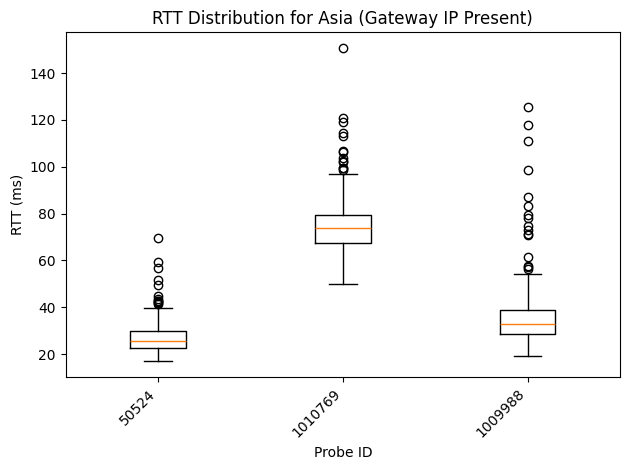

In [217]:
for continent, info in continents.items():
    if continent != "Asia":
        continue
    data = []
    labels = []
    for probe_id in info["probe_ids"]:
        probe_latencies = []
        probe_measurements = successful_measurements_gateway_presence_per_probe_id.get(probe_id, {}).get("present", [])
        for measurement in probe_measurements:
            for hop in measurement.hops:
                if hop.ip == gateway_ip and hop.rtt_times_ms:
                    mean_rtt = sum(hop.rtt_times_ms) / len(hop.rtt_times_ms)
                    probe_latencies.append(mean_rtt)
        if probe_latencies:
            data.append(probe_latencies)
            labels.append(str(probe_id))
    if data:
        fig, ax1 = plt.subplots()
        ax1.boxplot(data, tick_labels=labels)
        ax1.set_xlabel('Probe ID')
        ax1.set_ylabel('RTT (ms)')
        ax1.set_title(f'RTT Distribution for {continent} (Gateway IP Present)')
        for label in ax1.get_xticklabels():
            label.set_rotation(45)
            label.set_ha('right')
        fig.tight_layout()

### Asia

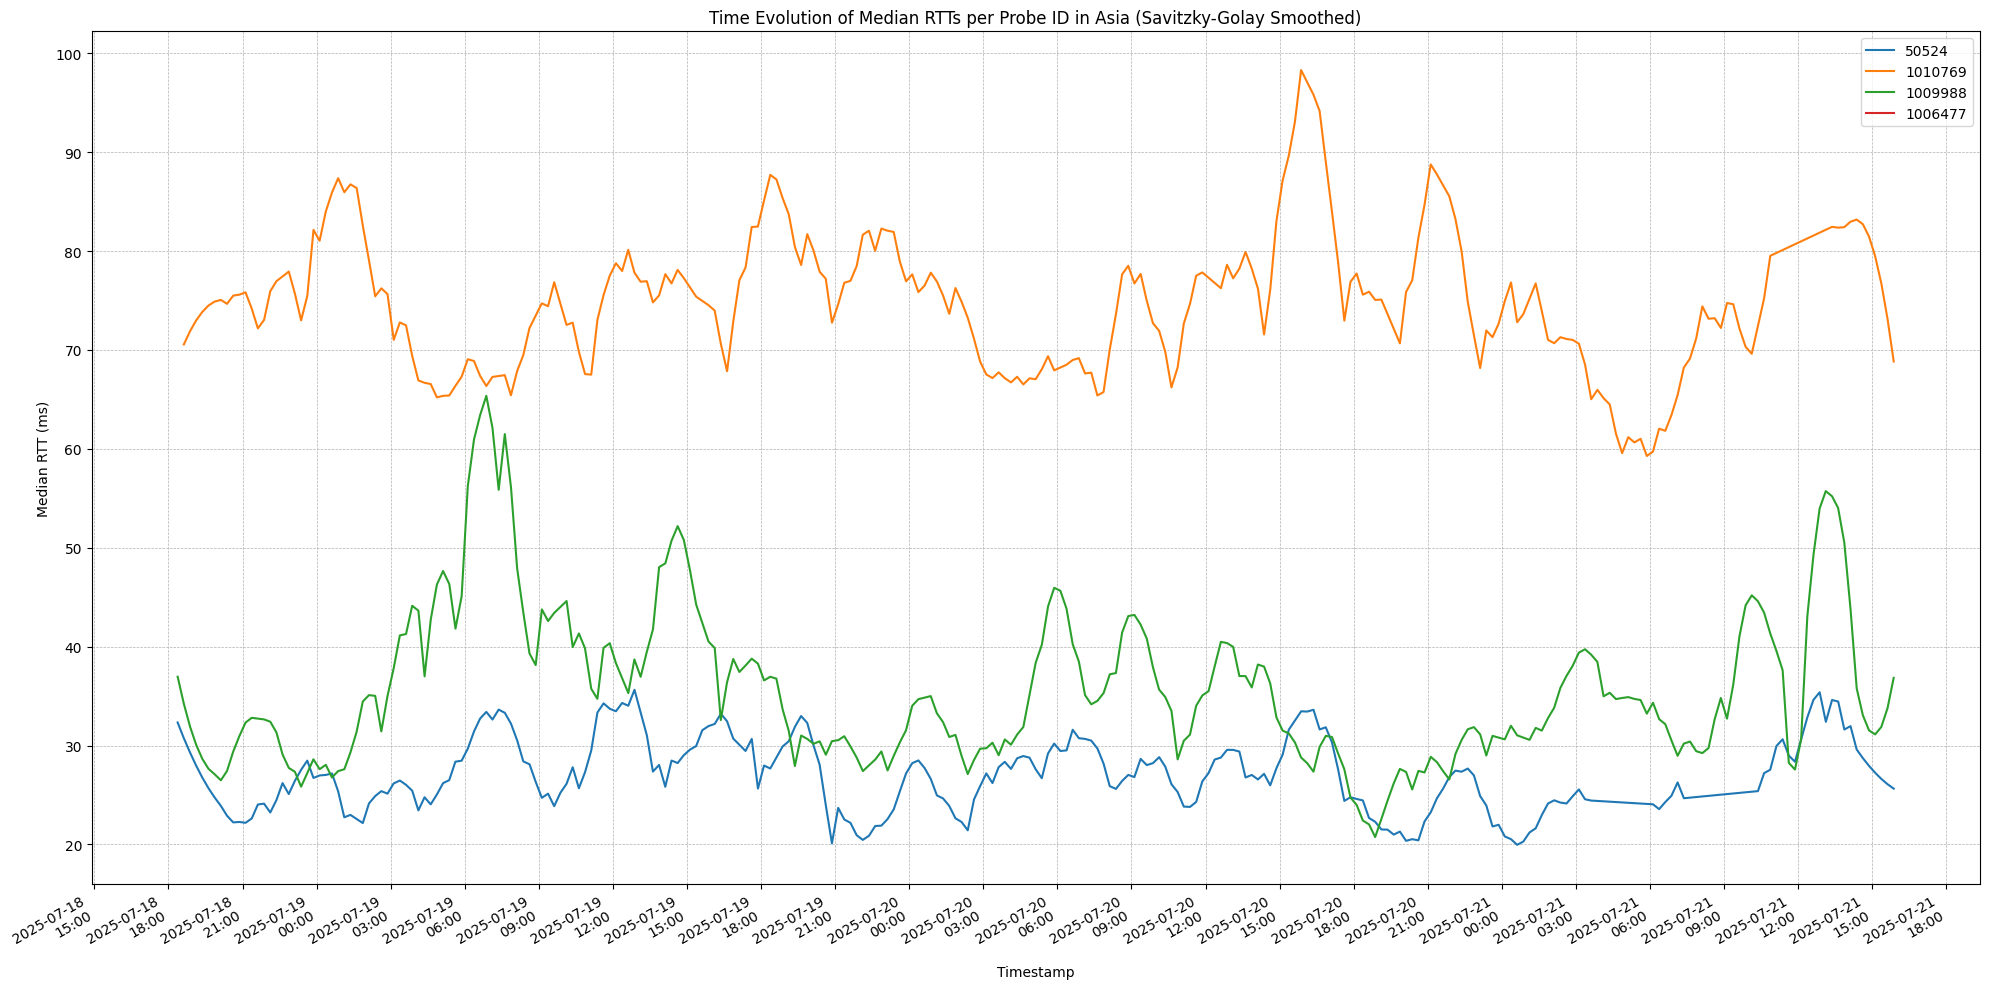

In [216]:
for continent, info in continents.items():
    if continent != "Asia":
        continue
    data = []
    labels = []
    for probe_id in info["probe_ids"]:
        probe_latencies = []
        probe_measurements = successful_measurements_gateway_presence_per_probe_id.get(probe_id, {}).get("present", [])
        for measurement in probe_measurements:
            for hop in measurement.hops:
                if hop.ip == gateway_ip and hop.rtt_times_ms:
                    mean_rtt = sum(hop.rtt_times_ms) / len(hop.rtt_times_ms)
                    probe_latencies.append(mean_rtt)
        if probe_latencies:
            data.append(probe_latencies)
            labels.append(str(probe_id))
    if data:
        fig, ax1 = plt.subplots(figsize=(20, 10))
        for probe_id in info["probe_ids"]:
            y = probe_time_series[probe_id]
            x = probe_time_stamps[probe_id]
            if len(y) >= 5:
                y_smooth = savgol_filter(y, window_length=13, polyorder=2)
                ax1.plot(x, y_smooth, label=str(probe_id))
            else:
                ax1.plot(x, y, label=str(probe_id))
        ax1.set_xlabel("Timestamp")
        ax1.set_ylabel("Median RTT (ms)")
        ax1.set_title(f"Time Evolution of Median RTTs per Probe ID in {continent} (Savitzky-Golay Smoothed)")
        ax1.legend()
        ax1.xaxis.set_major_locator(AutoDateLocator(minticks=10, maxticks=30))
        ax1.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n%H:%M"))
        fig.autofmt_xdate()
        ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
        fig.tight_layout()

### Europe

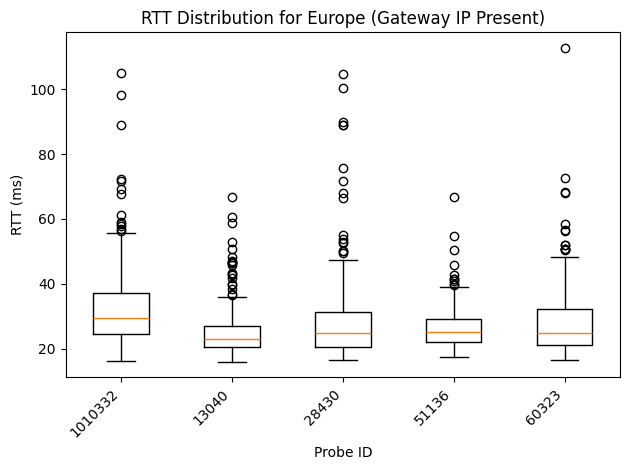

In [219]:
for continent, info in continents.items():
    if continent != "Europe":
        continue
    data = []
    labels = []
    for probe_id in info["probe_ids"]:
        probe_latencies = []
        probe_measurements = successful_measurements_gateway_presence_per_probe_id.get(probe_id, {}).get("present", [])
        for measurement in probe_measurements:
            for hop in measurement.hops:
                if hop.ip == gateway_ip and hop.rtt_times_ms:
                    mean_rtt = sum(hop.rtt_times_ms) / len(hop.rtt_times_ms)
                    probe_latencies.append(mean_rtt)
        if probe_latencies:
            data.append(probe_latencies)
            labels.append(str(probe_id))
    if data:
        fig, ax1 = plt.subplots()
        ax1.boxplot(data, tick_labels=labels)
        ax1.set_xlabel('Probe ID')
        ax1.set_ylabel('RTT (ms)')
        ax1.set_title(f'RTT Distribution for {continent} (Gateway IP Present)')
        for label in ax1.get_xticklabels():
            label.set_rotation(45)
            label.set_ha('right')
        fig.tight_layout()

### Europe

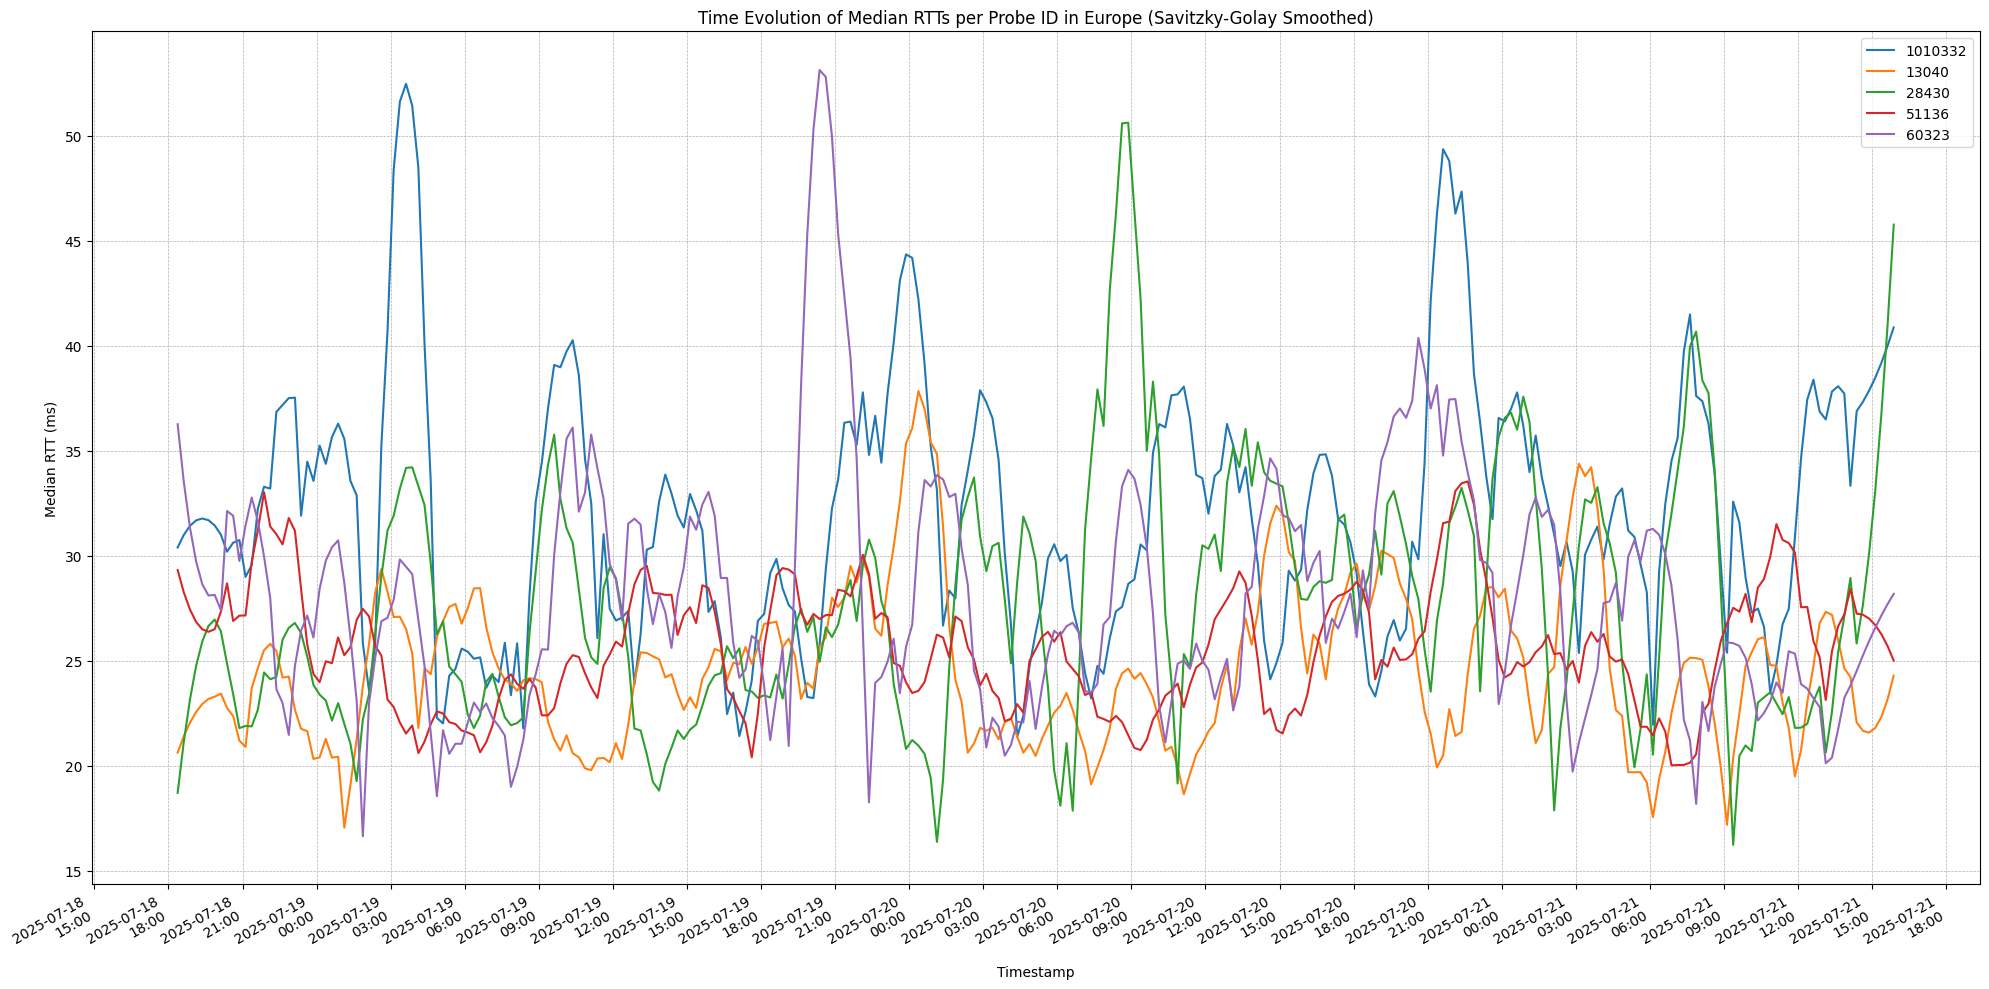

In [220]:
for continent, info in continents.items():
    if continent != "Europe":
        continue
    data = []
    labels = []
    for probe_id in info["probe_ids"]:
        probe_latencies = []
        probe_measurements = successful_measurements_gateway_presence_per_probe_id.get(probe_id, {}).get("present", [])
        for measurement in probe_measurements:
            for hop in measurement.hops:
                if hop.ip == gateway_ip and hop.rtt_times_ms:
                    mean_rtt = sum(hop.rtt_times_ms) / len(hop.rtt_times_ms)
                    probe_latencies.append(mean_rtt)
        if probe_latencies:
            data.append(probe_latencies)
            labels.append(str(probe_id))
    if data:
        fig, ax1 = plt.subplots(figsize=(20, 10))
        for probe_id in info["probe_ids"]:
            y = probe_time_series[probe_id]
            x = probe_time_stamps[probe_id]
            if len(y) >= 5:
                y_smooth = savgol_filter(y, window_length=13, polyorder=2)
                ax1.plot(x, y_smooth, label=str(probe_id))
            else:
                ax1.plot(x, y, label=str(probe_id))
        ax1.set_xlabel("Timestamp")
        ax1.set_ylabel("Median RTT (ms)")
        ax1.set_title(f"Time Evolution of Median RTTs per Probe ID in {continent} (Savitzky-Golay Smoothed)")
        ax1.legend()
        ax1.xaxis.set_major_locator(AutoDateLocator(minticks=10, maxticks=30))
        ax1.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n%H:%M"))
        fig.autofmt_xdate()
        ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
        fig.tight_layout()

### Oceania

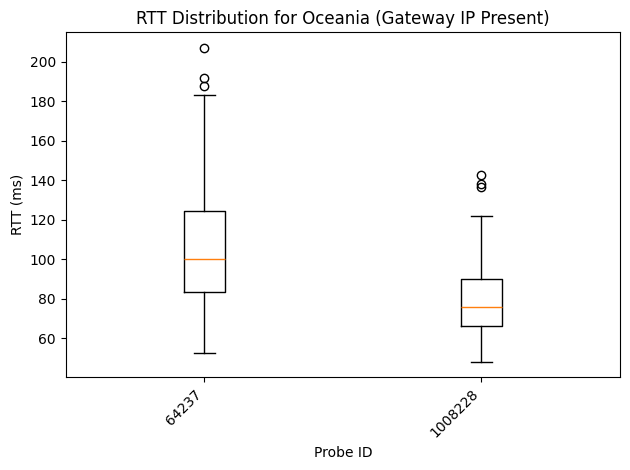

In [221]:
for continent, info in continents.items():
    if continent != "Oceania":
        continue
    data = []
    labels = []
    for probe_id in info["probe_ids"]:
        probe_latencies = []
        probe_measurements = successful_measurements_gateway_presence_per_probe_id.get(probe_id, {}).get("present", [])
        for measurement in probe_measurements:
            for hop in measurement.hops:
                if hop.ip == gateway_ip and hop.rtt_times_ms:
                    mean_rtt = sum(hop.rtt_times_ms) / len(hop.rtt_times_ms)
                    probe_latencies.append(mean_rtt)
        if probe_latencies:
            data.append(probe_latencies)
            labels.append(str(probe_id))
    if data:
        fig, ax1 = plt.subplots()
        ax1.boxplot(data, tick_labels=labels)
        ax1.set_xlabel('Probe ID')
        ax1.set_ylabel('RTT (ms)')
        ax1.set_title(f'RTT Distribution for {continent} (Gateway IP Present)')
        for label in ax1.get_xticklabels():
            label.set_rotation(45)
            label.set_ha('right')
        fig.tight_layout()

### Oceania

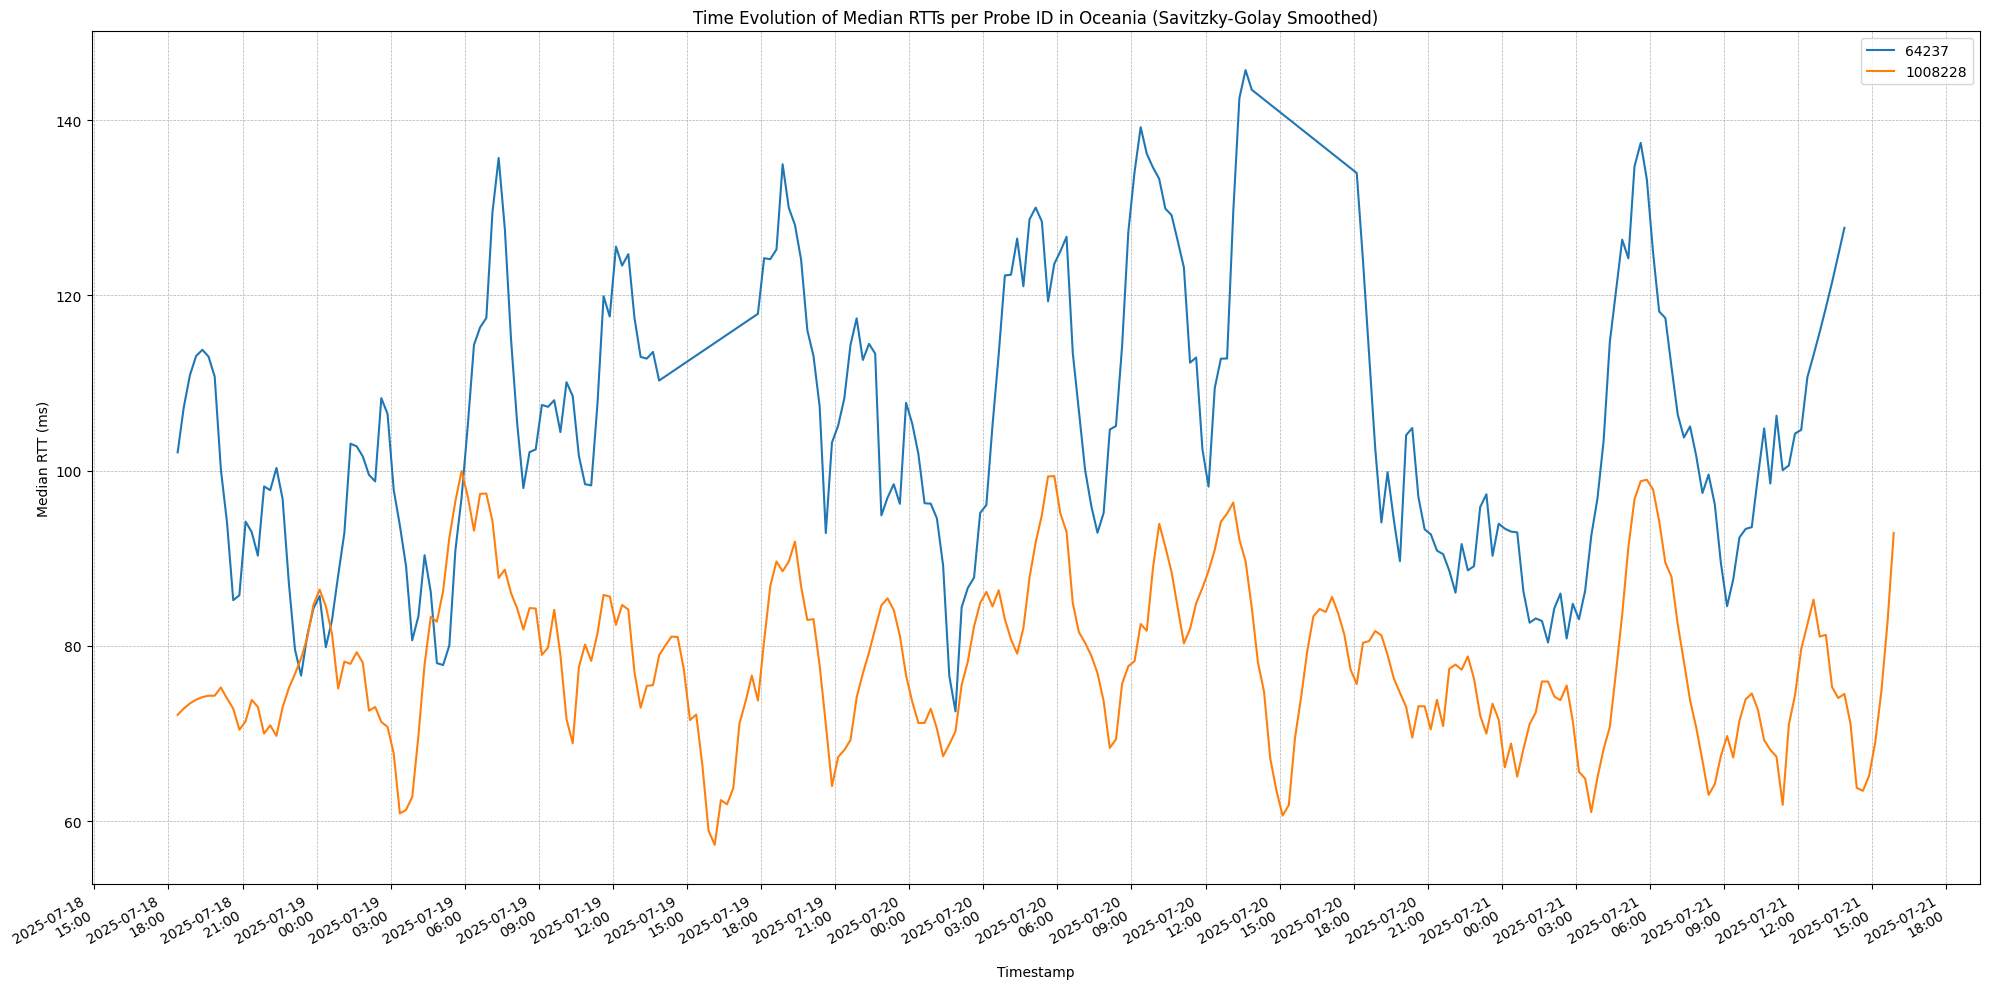

In [222]:
for continent, info in continents.items():
    if continent != "Oceania":
        continue
    data = []
    labels = []
    for probe_id in info["probe_ids"]:
        probe_latencies = []
        probe_measurements = successful_measurements_gateway_presence_per_probe_id.get(probe_id, {}).get("present", [])
        for measurement in probe_measurements:
            for hop in measurement.hops:
                if hop.ip == gateway_ip and hop.rtt_times_ms:
                    mean_rtt = sum(hop.rtt_times_ms) / len(hop.rtt_times_ms)
                    probe_latencies.append(mean_rtt)
        if probe_latencies:
            data.append(probe_latencies)
            labels.append(str(probe_id))
    if data:
        fig, ax1 = plt.subplots(figsize=(20, 10))
        for probe_id in info["probe_ids"]:
            y = probe_time_series[probe_id]
            x = probe_time_stamps[probe_id]
            if len(y) >= 5:
                y_smooth = savgol_filter(y, window_length=13, polyorder=2)
                ax1.plot(x, y_smooth, label=str(probe_id))
            else:
                ax1.plot(x, y, label=str(probe_id))
        ax1.set_xlabel("Timestamp")
        ax1.set_ylabel("Median RTT (ms)")
        ax1.set_title(f"Time Evolution of Median RTTs per Probe ID in {continent} (Savitzky-Golay Smoothed)")
        ax1.legend()
        ax1.xaxis.set_major_locator(AutoDateLocator(minticks=10, maxticks=30))
        ax1.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n%H:%M"))
        fig.autofmt_xdate()
        ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
        fig.tight_layout()

### North America

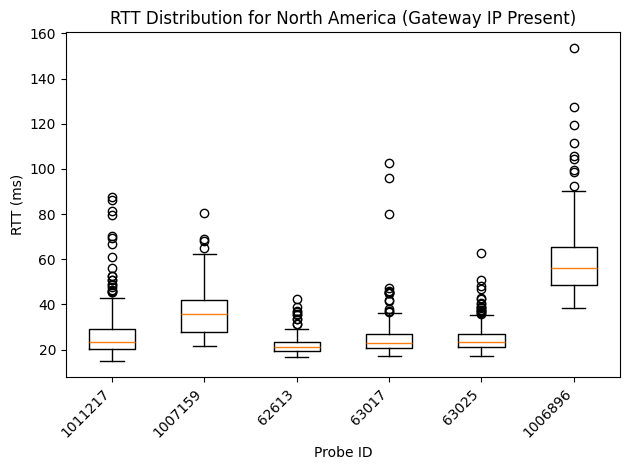

In [223]:
for continent, info in continents.items():
    if continent != "North America":
        continue
    data = []
    labels = []
    for probe_id in info["probe_ids"]:
        probe_latencies = []
        probe_measurements = successful_measurements_gateway_presence_per_probe_id.get(probe_id, {}).get("present", [])
        for measurement in probe_measurements:
            for hop in measurement.hops:
                if hop.ip == gateway_ip and hop.rtt_times_ms:
                    mean_rtt = sum(hop.rtt_times_ms) / len(hop.rtt_times_ms)
                    probe_latencies.append(mean_rtt)
        if probe_latencies:
            data.append(probe_latencies)
            labels.append(str(probe_id))
    if data:
        fig, ax1 = plt.subplots()
        ax1.boxplot(data, tick_labels=labels)
        ax1.set_xlabel('Probe ID')
        ax1.set_ylabel('RTT (ms)')
        ax1.set_title(f'RTT Distribution for {continent} (Gateway IP Present)')
        for label in ax1.get_xticklabels():
            label.set_rotation(45)
            label.set_ha('right')
        fig.tight_layout()

### North America

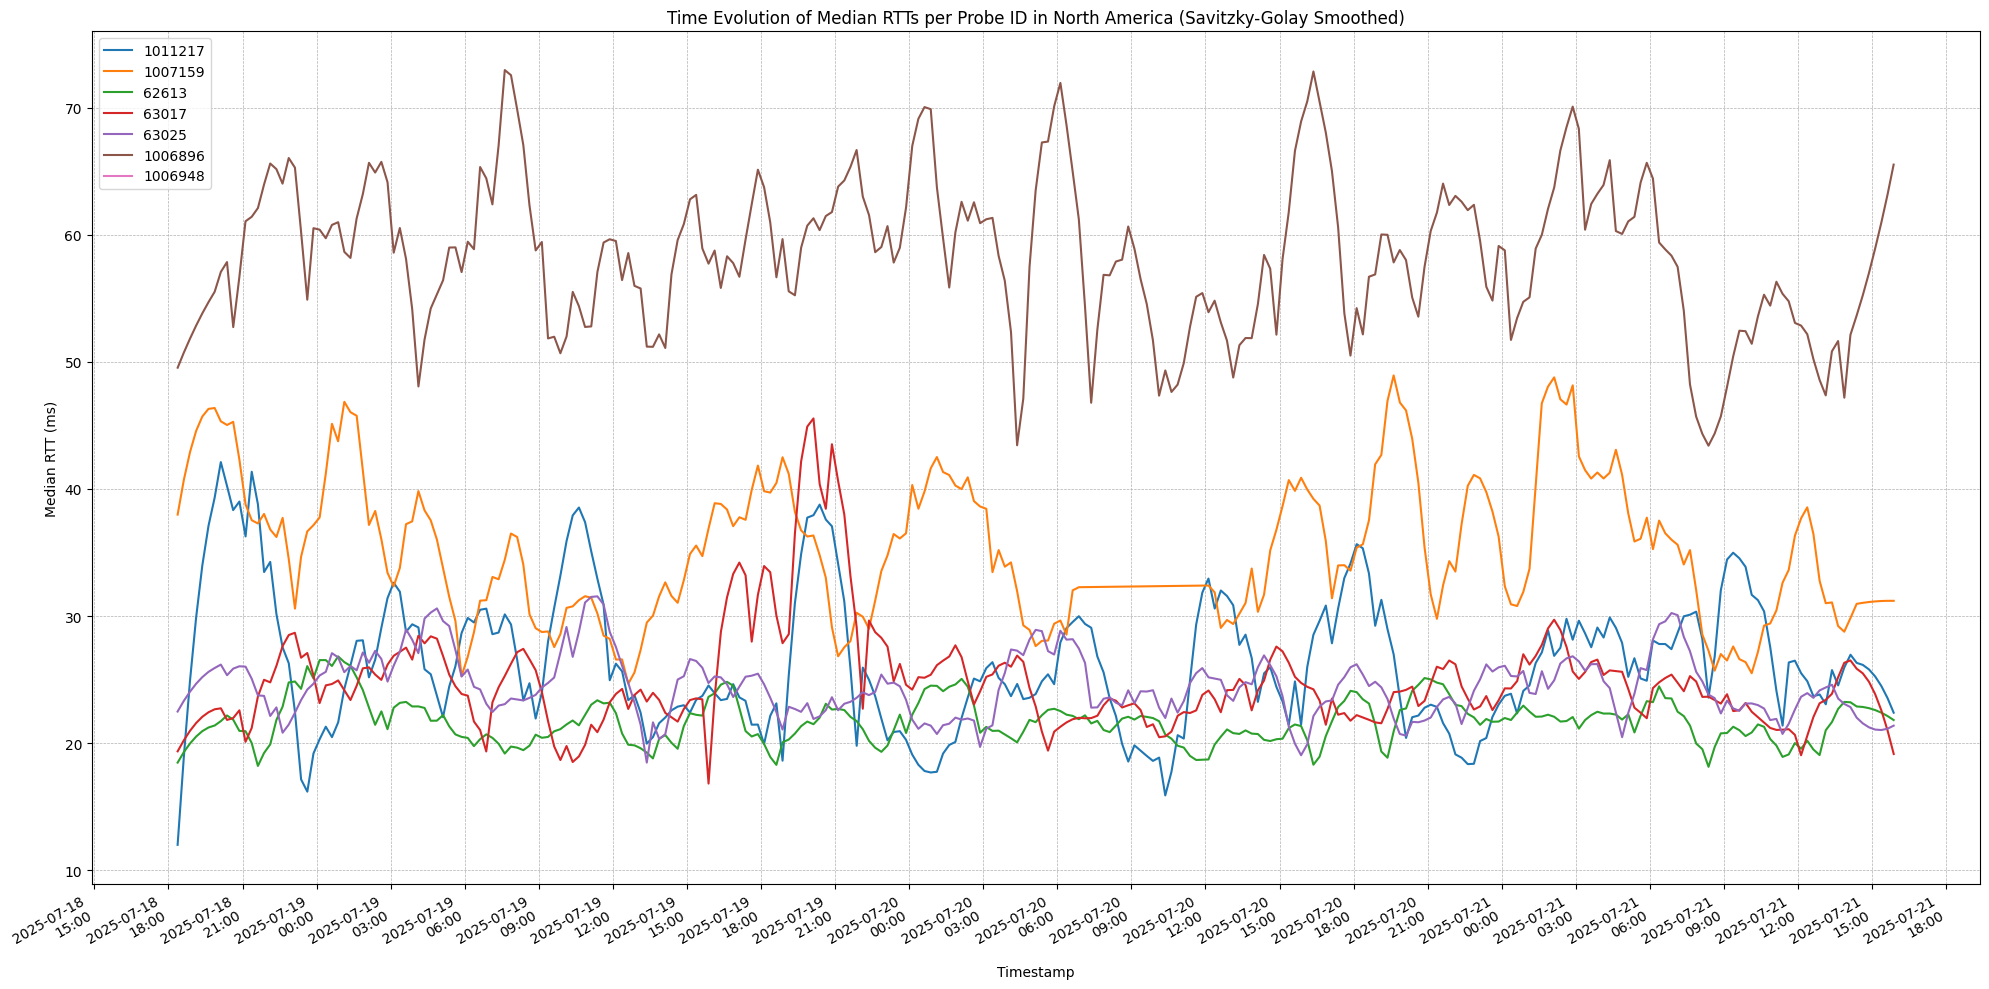

In [224]:
for continent, info in continents.items():
    if continent != "North America":
        continue
    data = []
    labels = []
    for probe_id in info["probe_ids"]:
        probe_latencies = []
        probe_measurements = successful_measurements_gateway_presence_per_probe_id.get(probe_id, {}).get("present", [])
        for measurement in probe_measurements:
            for hop in measurement.hops:
                if hop.ip == gateway_ip and hop.rtt_times_ms:
                    mean_rtt = sum(hop.rtt_times_ms) / len(hop.rtt_times_ms)
                    probe_latencies.append(mean_rtt)
        if probe_latencies:
            data.append(probe_latencies)
            labels.append(str(probe_id))
    if data:
        fig, ax1 = plt.subplots(figsize=(20, 10))
        for probe_id in info["probe_ids"]:
            y = probe_time_series[probe_id]
            x = probe_time_stamps[probe_id]
            if len(y) >= 5:
                y_smooth = savgol_filter(y, window_length=13, polyorder=2)
                ax1.plot(x, y_smooth, label=str(probe_id))
            else:
                ax1.plot(x, y, label=str(probe_id))
        ax1.set_xlabel("Timestamp")
        ax1.set_ylabel("Median RTT (ms)")
        ax1.set_title(f"Time Evolution of Median RTTs per Probe ID in {continent} (Savitzky-Golay Smoothed)")
        ax1.legend()
        ax1.xaxis.set_major_locator(AutoDateLocator(minticks=10, maxticks=30))
        ax1.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n%H:%M"))
        fig.autofmt_xdate()
        ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
        fig.tight_layout()

### South America

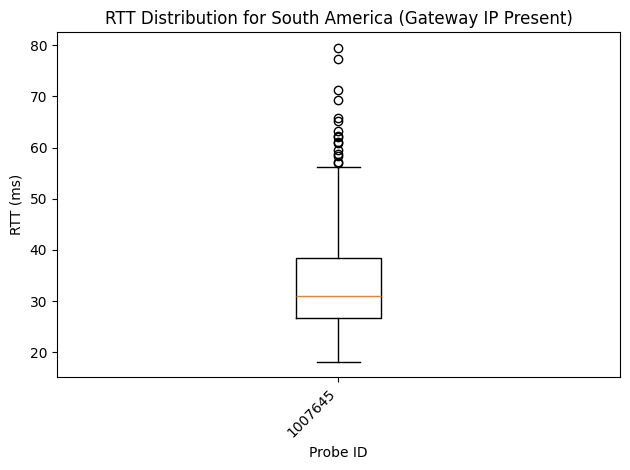

In [225]:
for continent, info in continents.items():
    if continent != "South America":
        continue
    data = []
    labels = []
    for probe_id in info["probe_ids"]:
        probe_latencies = []
        probe_measurements = successful_measurements_gateway_presence_per_probe_id.get(probe_id, {}).get("present", [])
        for measurement in probe_measurements:
            for hop in measurement.hops:
                if hop.ip == gateway_ip and hop.rtt_times_ms:
                    mean_rtt = sum(hop.rtt_times_ms) / len(hop.rtt_times_ms)
                    probe_latencies.append(mean_rtt)
        if probe_latencies:
            data.append(probe_latencies)
            labels.append(str(probe_id))
    if data:
        fig, ax1 = plt.subplots()
        ax1.boxplot(data, tick_labels=labels)
        ax1.set_xlabel('Probe ID')
        ax1.set_ylabel('RTT (ms)')
        ax1.set_title(f'RTT Distribution for {continent} (Gateway IP Present)')
        for label in ax1.get_xticklabels():
            label.set_rotation(45)
            label.set_ha('right')
        fig.tight_layout()

### South America

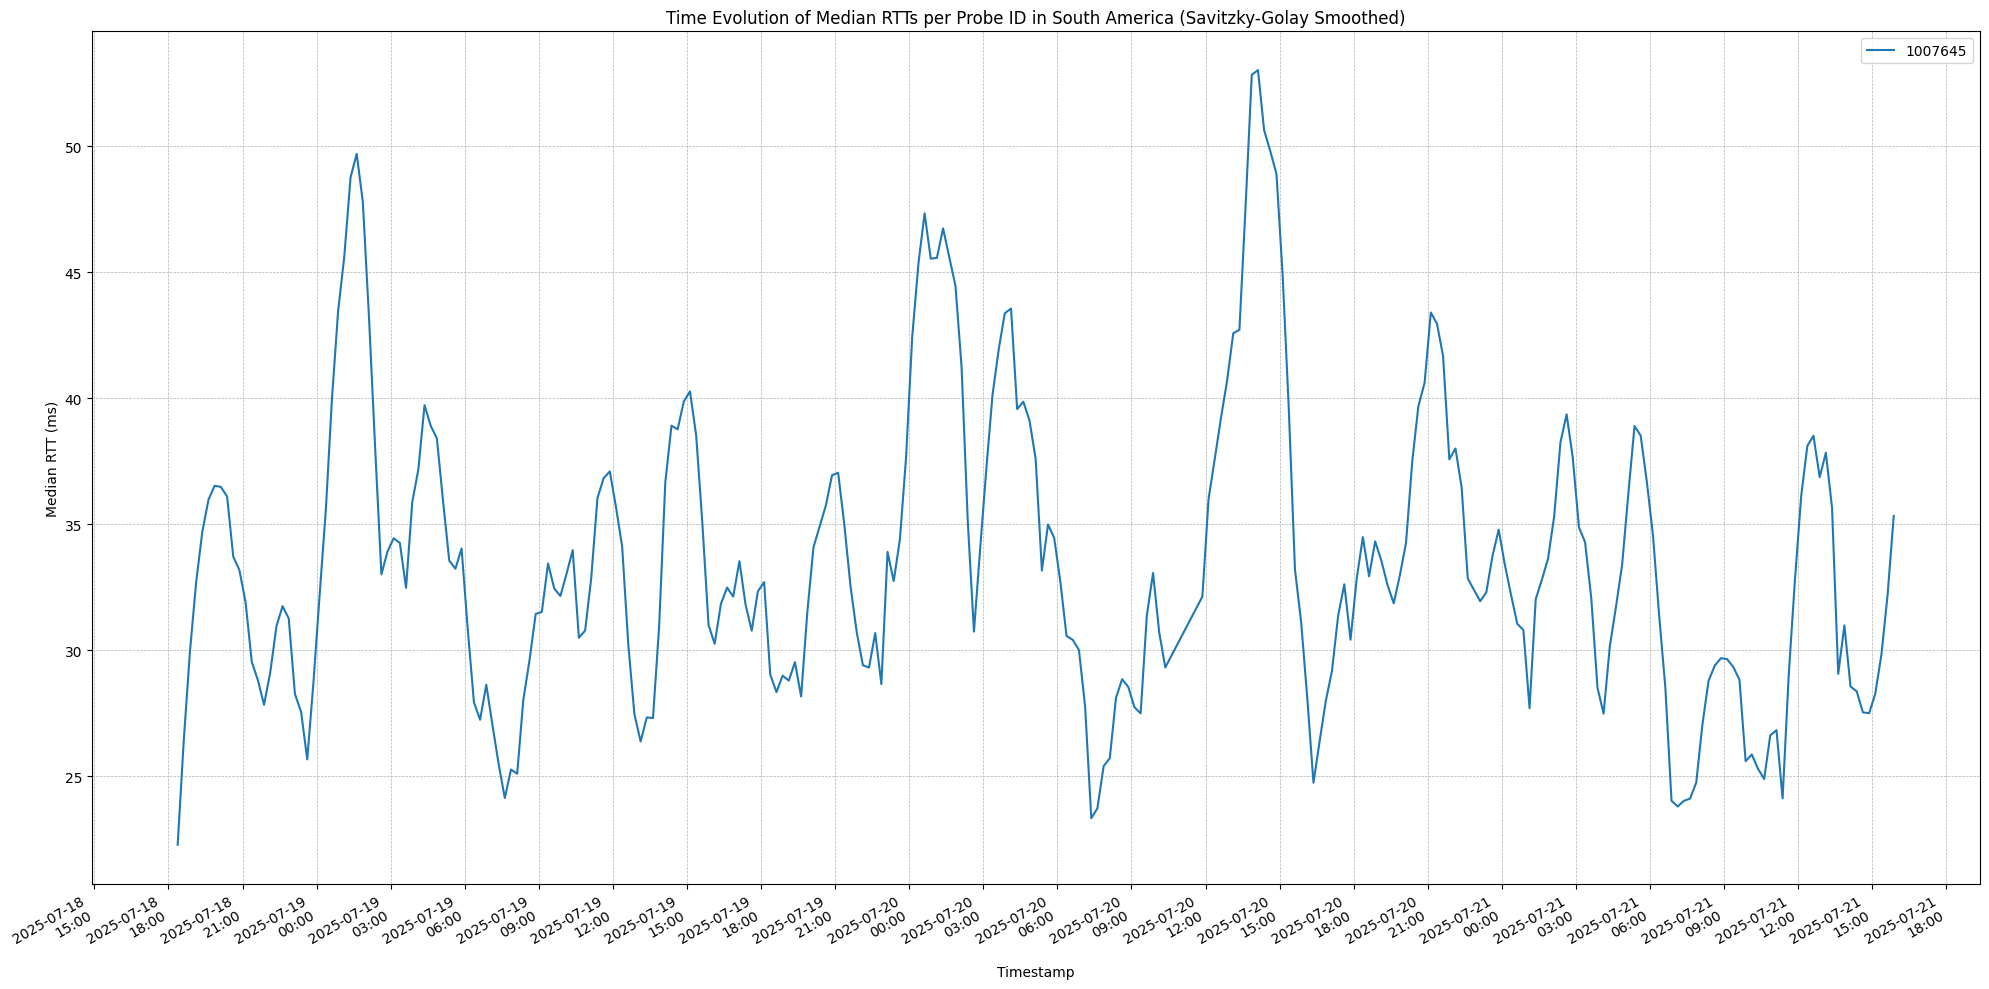

In [226]:
for continent, info in continents.items():
    if continent != "South America":
        continue
    data = []
    labels = []
    for probe_id in info["probe_ids"]:
        probe_latencies = []
        probe_measurements = successful_measurements_gateway_presence_per_probe_id.get(probe_id, {}).get("present", [])
        for measurement in probe_measurements:
            for hop in measurement.hops:
                if hop.ip == gateway_ip and hop.rtt_times_ms:
                    mean_rtt = sum(hop.rtt_times_ms) / len(hop.rtt_times_ms)
                    probe_latencies.append(mean_rtt)
        if probe_latencies:
            data.append(probe_latencies)
            labels.append(str(probe_id))
    if data:
        fig, ax1 = plt.subplots(figsize=(20, 10))
        for probe_id in info["probe_ids"]:
            y = probe_time_series[probe_id]
            x = probe_time_stamps[probe_id]
            if len(y) >= 5:
                y_smooth = savgol_filter(y, window_length=13, polyorder=2)
                ax1.plot(x, y_smooth, label=str(probe_id))
            else:
                ax1.plot(x, y, label=str(probe_id))
        ax1.set_xlabel("Timestamp")
        ax1.set_ylabel("Median RTT (ms)")
        ax1.set_title(f"Time Evolution of Median RTTs per Probe ID in {continent} (Savitzky-Golay Smoothed)")
        ax1.legend()
        ax1.xaxis.set_major_locator(AutoDateLocator(minticks=10, maxticks=30))
        ax1.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n%H:%M"))
        fig.autofmt_xdate()
        ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
        fig.tight_layout()